# Dermatology MNIST: Data Loading and Exploration

### Instalacion de los Datos (MedMNIST) en Local

**Nota**: Solo correr 1 vez, para instalar por primera vez

In [1]:
#%pip install medmnist

## Importacion de librerias necesarias

In [2]:
import medmnist
from medmnist import INFO, Evaluator
from medmnist.dataset import DermaMNIST

import numpy as np
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import dataset_without_pytorch
from dataset_without_pytorch import get_loader

## Carga de datos DermaMNIST

In [3]:
# Informacion del Dataset
dataset_info = INFO['dermamnist']

# Imprimir metadatos importantes del dataset
print("Nombre del Dataset: ", dataset_info['python_class'])
print("Descripción:", dataset_info['description'])
print("Etiquetas:")
for key, value in dataset_info['label'].items():
    print(f"  {key}: {value}")
print("Número de muestras:")
for key, value in dataset_info['n_samples'].items():
    print(f"  {key}: {value}")
print("Tarea:", dataset_info['task'])
print("Canales de imagenes: ", dataset_info['n_channels'])
print("Licencia:", dataset_info['license'])

Nombre del Dataset:  DermaMNIST
Descripción: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
Etiquetas:
  0: actinic keratoses and intraepithelial carcinoma
  1: basal cell carcinoma
  2: benign keratosis-like lesions
  3: dermatofibroma
  4: melanoma
  5: melanocytic nevi
  6: vascular lesions
Número de muestras:
  train: 7007
  val: 1003
  test: 2005
Tarea: multi-class
Canales de imagenes:  3
Licencia: CC BY-NC 4.0


### Datos 2D 28X28

In [4]:
data_flag = 'dermamnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info_28 = INFO[data_flag]
task_28 = info_28['task']
n_channels_28 = info_28['n_channels']
n_classes_28 = len(info_28['label'])

DataClass_28 = getattr(dataset_without_pytorch, info_28['python_class'])


# load the data
train_dataset_28 = DataClass_28(split='train', download=download)

# encapsulate data into dataloader form
train_loader_28 = get_loader(dataset=train_dataset_28, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\matun\.medmnist\dermamnist.npz


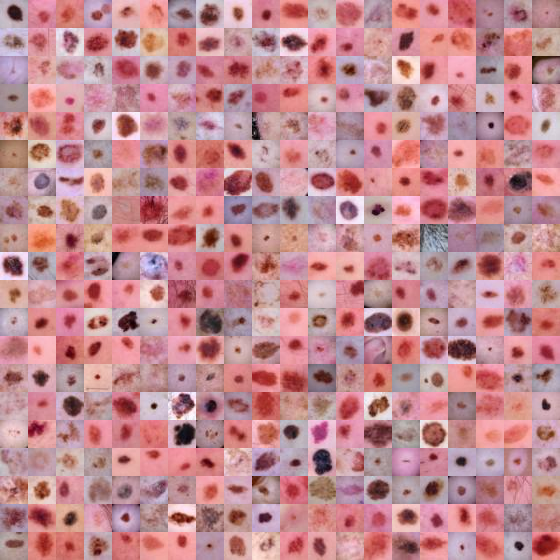

In [5]:
train_dataset_28.montage(length=20)

### Datos 2D 128x128

In [6]:
info_128 = INFO[data_flag]
task_128 = info_128['task']
n_channels_128 = info_128['n_channels']
n_classes_128 = len(info_128['label'])

DataClass_128 = getattr(dataset_without_pytorch, info_128['python_class'])

# load the data
train_dataset_128 = DataClass_128(split='train', download=download, size=128, mmap_mode='r')

# encapsulate data into dataloader form
train_loader_128 = get_loader(dataset=train_dataset_128, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\matun\.medmnist\dermamnist_128.npz


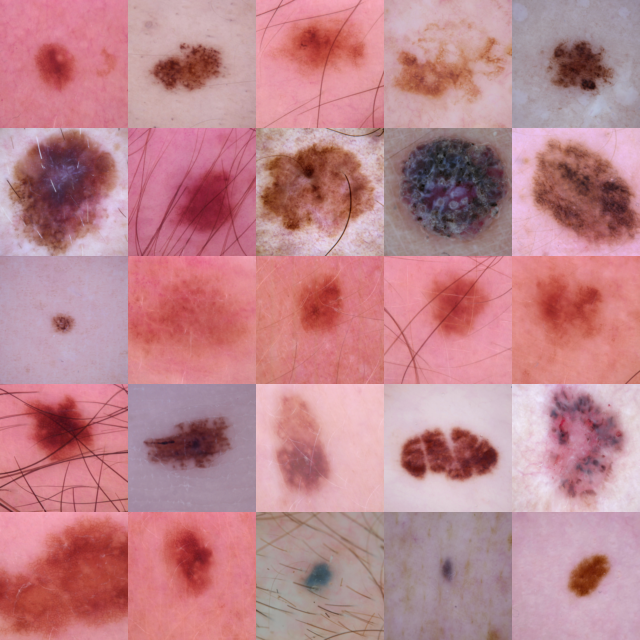

In [7]:
train_dataset_128.montage(length=5)

## Imagenes y etiquetas de datos de entrenamiento

In [8]:
images = train_dataset_28.imgs
labels = train_dataset_28.labels

In [9]:
# Lista de etiquetas con descripciones
label_descriptions = {
    0: 'Actinic Keratoses / Intraepithelial Carcinoma',
    1: 'Basal Cell Carcinoma',
    2: 'Benign Keratosis-like Lesions',
    3: 'Dermatofibroma',
    4: 'Melanoma',
    5: 'Melanocytic Nevi',
    6: 'Vascular Lesions'
}

## Visualizaciones y exploración inicial de los datos

### Conteo por etiqueta

C:\Users\matun\AppData\Local\Temp\ipykernel_1188\54989074.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_counts, palette='viridis')


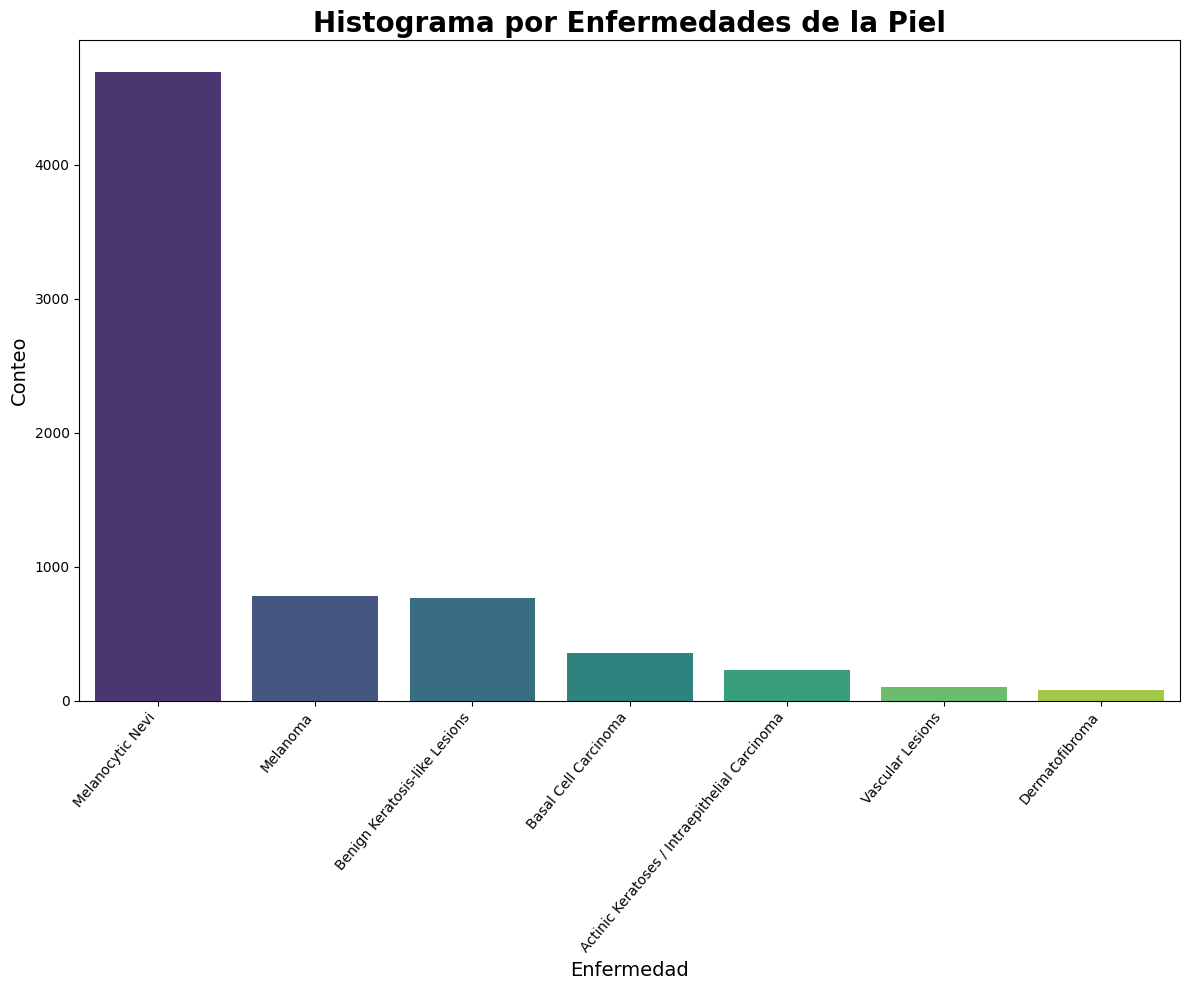

In [12]:
labels_list = [label.item() for label in labels]   
df_labels = pd.DataFrame(labels_list, columns=['label'])

# Reemplazar las etiquetas numéricas por las descripciones
df_labels['label'] = df_labels['label'].map(label_descriptions)

# Contar la frecuencia de cada etiqueta
label_counts = df_labels['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Graficar el histograma usando Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='label', y='count', data=label_counts, palette='viridis')

# Mejorar el diseño
plt.title('Histograma por Enfermedades de la Piel', fontsize=20, weight='bold')
plt.xlabel('Enfermedad', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
plt.xticks(rotation=50, ha='right', fontsize=10)  # Rotar las etiquetas para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Informacion promedio por color

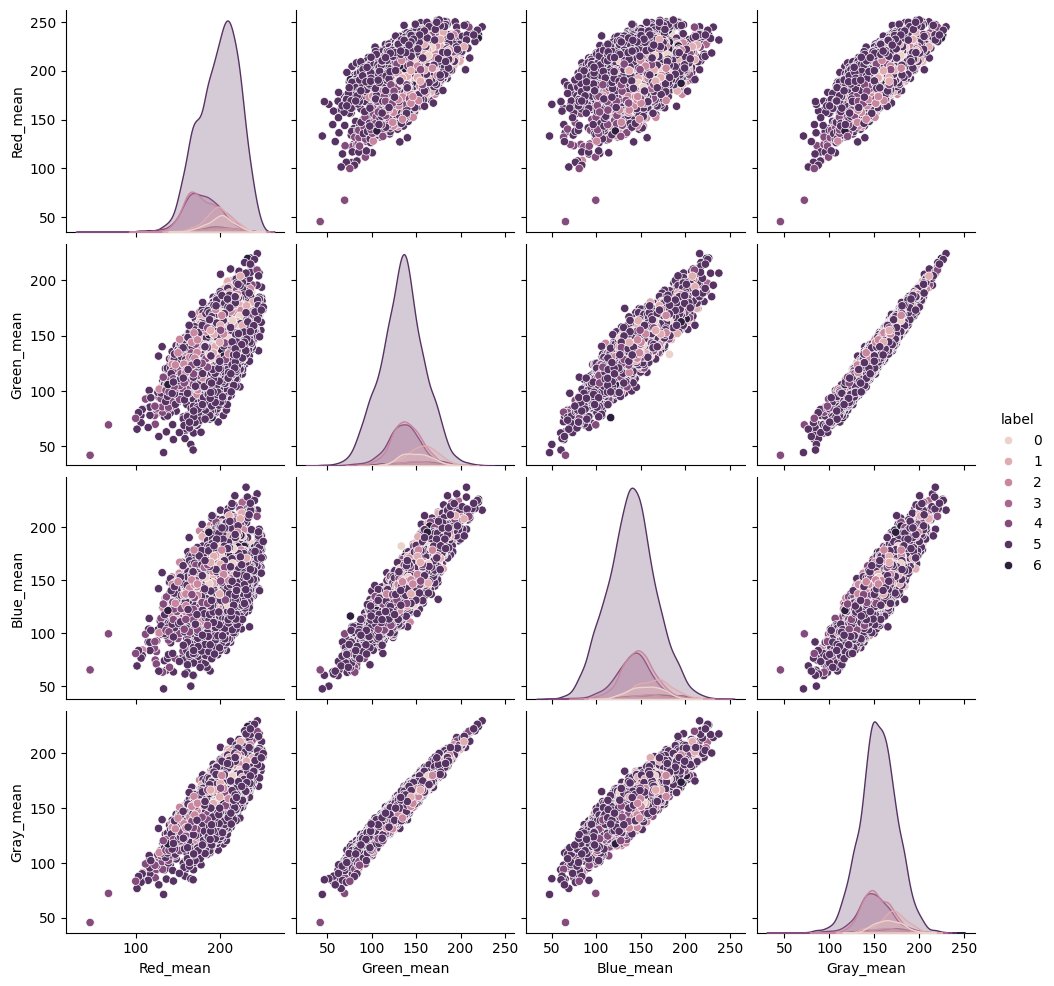

In [13]:
red_means = []
green_means = []
blue_means = []
gray_means = []
labels_m = []

i = 0

for image in images:
    red_mean = image[:, :, 0].mean()   
    green_mean = image[:, :, 1].mean() 
    blue_mean = image[:, :, 2].mean() 

    gray_mean = (0.2989 * red_mean + 0.5870 * green_mean + 0.1140 * blue_mean)

    red_means.append(red_mean)
    green_means.append(green_mean)
    blue_means.append(blue_mean)
    gray_means.append(gray_mean)
    labels_m.append(labels[i].item())
    
    i += 1
    

data = {
    'Red_mean': red_means,
    'Green_mean': green_means,
    'Blue_mean': blue_means,
    'Gray_mean': gray_means,
    'label': labels_m
}
df = pd.DataFrame(data)

sns.pairplot(df, hue='label', diag_kind='kde')

plt.show()

### Distribuciones por etiqueta y canal RGB

C:\Users\matun\AppData\Local\Temp\ipykernel_1188\1642654289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Red_mean', data=df, palette='Reds', ax=axs[0])
C:\Users\matun\AppData\Local\Temp\ipykernel_1188\1642654289.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Green_mean', data=df, palette='Greens', ax=axs[1])
C:\Users\matun\AppData\Local\Temp\ipykernel_1188\1642654289.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Blue_mean', data=df, palette='Blues', ax=axs[2])


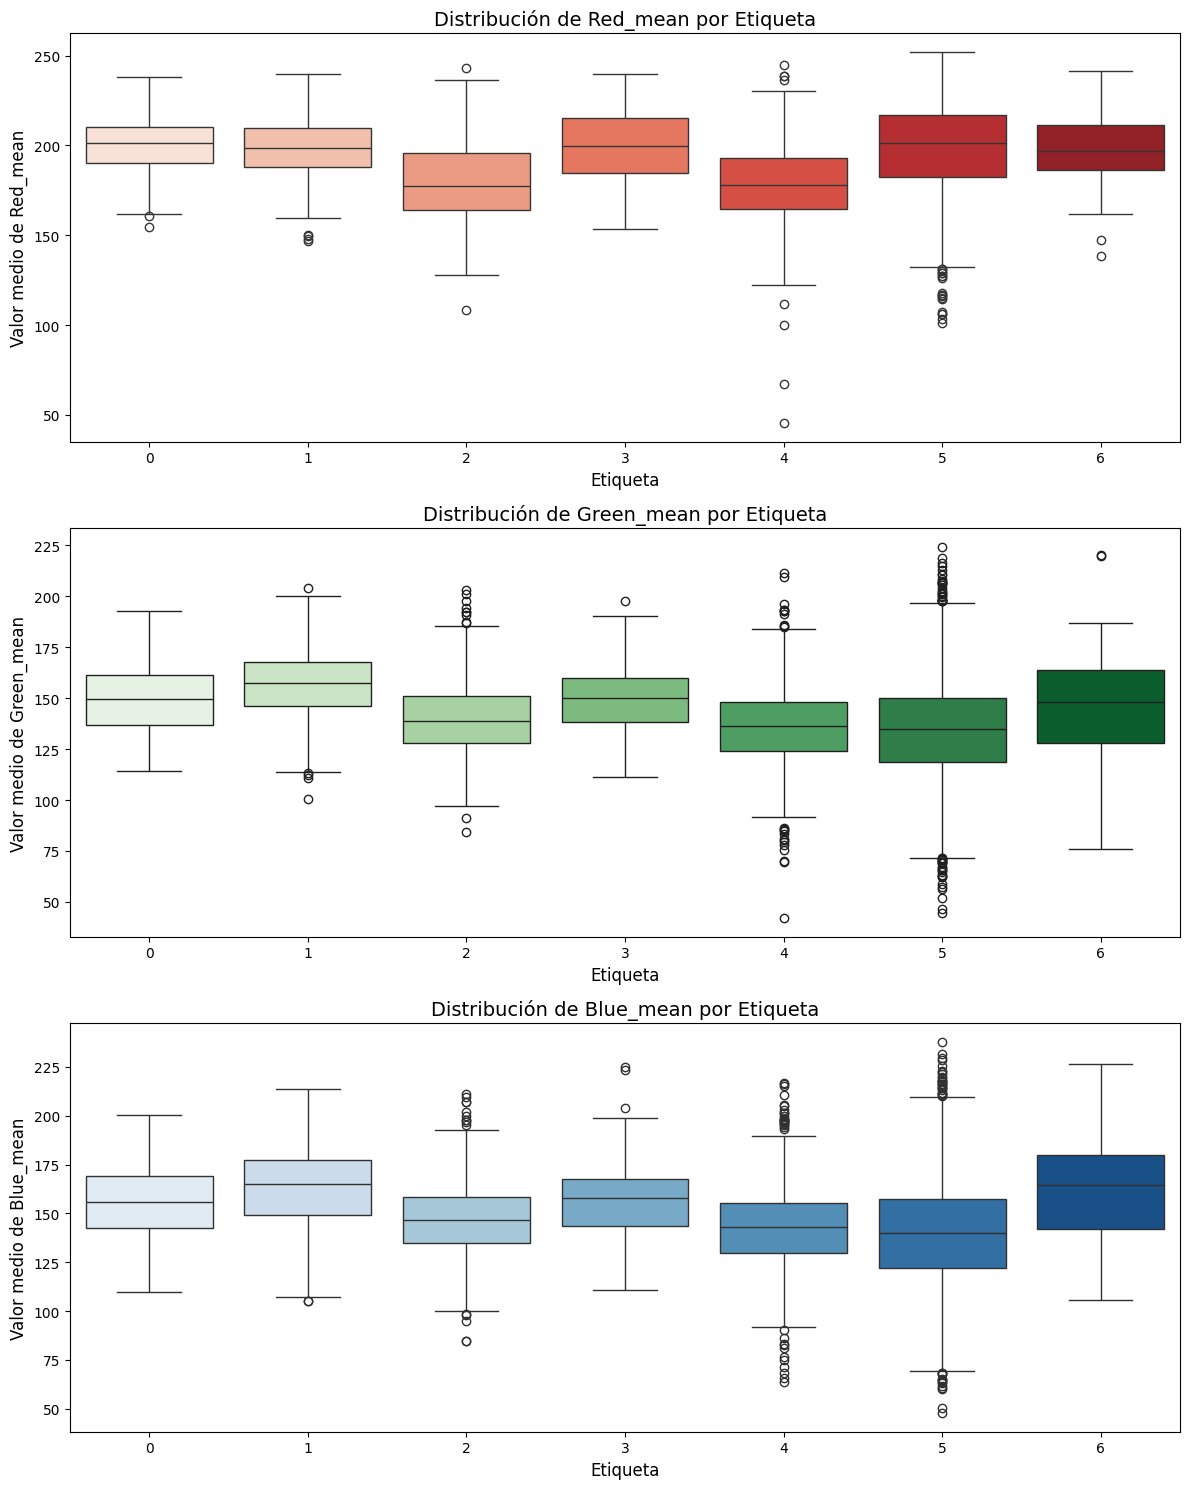

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# 1. Gráfico para el canal Rojo (Red_mean)
sns.boxplot(x='label', y='Red_mean', data=df, palette='Reds', ax=axs[0])
axs[0].set_title('Distribución de Red_mean por Etiqueta', fontsize=14)
axs[0].set_xlabel('Etiqueta', fontsize=12)
axs[0].set_ylabel('Valor medio de Red_mean', fontsize=12)

# 2. Gráfico para el canal Verde (Green_mean)
sns.boxplot(x='label', y='Green_mean', data=df, palette='Greens', ax=axs[1])
axs[1].set_title('Distribución de Green_mean por Etiqueta', fontsize=14)
axs[1].set_xlabel('Etiqueta', fontsize=12)
axs[1].set_ylabel('Valor medio de Green_mean', fontsize=12)

# 3. Gráfico para el canal Azul (Blue_mean)
sns.boxplot(x='label', y='Blue_mean', data=df, palette='Blues', ax=axs[2])
axs[2].set_title('Distribución de Blue_mean por Etiqueta', fontsize=14)
axs[2].set_xlabel('Etiqueta', fontsize=12)
axs[2].set_ylabel('Valor medio de Blue_mean', fontsize=12)

plt.tight_layout()

plt.show()